<a href="https://colab.research.google.com/github/MinjuKim0217/Python-Machine-Learning-Book/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B5%90%EA%B3%BC%EC%84%9C_4%EC%9E%A5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 좋은 훈련 데이터셋 만들기: 데이터 전처리

학습 알고리즘에 데이터를 주입하기 전에 조사하고 전처리하는 것이 매우 중요하다. 

- 데이터셋에서 누락된 값을 제거하거나 대체하기
- 머신러닝 알고리즘을 위해 범주혈 데이터 변환하기
- 모델과 관련이 높은 특성 선택하기


## 누락된 데이터 다루기

일반적으로 누락된 값은 데이터 데이블에 빈 공간이나 예약된 문자열로 채워진다. 숫자가 아니라는 의미의 NaN이나 NULL과 같은 값을 쓴다. 

분석을 더 진행하기 전에 누락된 값을 처리하는 것이 중요하다. 

### 테이블 형태 데이터에서 누락된 값 식별



In [41]:
# 간단한 예제 데이터셋
import pandas as pd
from io import StringIO

csv_data=\
'''A,B,C,D
1.2,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0'''
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.2,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [42]:
# isnull() 함수는 셀이 수치값을 담고 있는지 혹은 누락되어 있는지를 나타내는 불리언값 리턴
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [43]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### 누락된 값이 있는 훈련 샘플이나 특성 제외

누락된 데이터를 다우는 가장 쉬운 방법 중 하나는 데이터셋에서 해당 훈련 샘플 (행) 이나 특성 (열)을 완전히 지우는 것

In [44]:
df.dropna(axis=1)

,A,B
0,1.2,2.0
1,5.0,6.0
2,10.0,11.0


In [45]:
#모든 열이 NaN알 때만 행 삭제
df.dropna(how='all')

,A,B,C,D
0,1.2,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [46]:
#NaN이 아닌 값이 네 개보다 작은 행을 삭제
df.dropna(thresh=4)

,A,B,C,D
0,1.2,2.0,3.0,4.0


In [47]:
# 특정 열에 NaN이 있는 행만 삭제한다. 
df.dropna(subset=['C'])

,A,B,C,D
0,1.2,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### 누락된 값 대체

훈련 데이터 샘플에서 열이나 행을 전부 다 지우게 되면 유용한 정보가 손실되는 경우가 있기 때문에 보간 방법을 쓰기도 한다. 

가장 흔한 보간 방법은 평균으로 대체하는 것이다. 

사이킷런의 SimpleImputer 클래스를 활용하면 간편하게 처리 가능하다. 

strategy 매개변수에 설정할 수 있는 다른 값으로는 median, most_frequent등이 있다. -> 범주형 데이터를 대체할 때 유용하다. 

In [48]:
from sklearn.impute import SimpleImputer
import numpy as np

imr=SimpleImputer(missing_values=np.nan, strategy='mean')
imr=imr.fit(df.values)
imputed_data=imr.transform(df.values)
imputed_data

array([[ 1.2,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [49]:
# 판다스 데이터프레임 객체에서 바로 평균값으로 누락된 값을 대체할 수 있음

df.fillna(df.mean())

,A,B,C,D
0,1.2,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### 사이킷런 추정기 API 익히기

SimpleImputer 클래스는 데이터 변환에 사용되는 사이킷런의 변환기 (transformer) 클래스이다. 이런 추정기의 주요 메서드 두개는 fit, tranform 

- fit: 훈련 데이터에서 모델 파라미터 학습
- transform:  학습한 파라미터로 데이터를 변환-> 변환하려는 데이터 배열은 모델 학습에 사용한 데이터의 특성 개수와 같아야 한다. 



In [50]:
from IPython.display import Image
Image(url='https://git.io/Jtmwv', width=400) 

3장에서 사용한 분류기는 변환기와 매우 유사한 사이킷런의 추정기이다.  predict 메서드가 있지만 transform 메서드도 가질수 있다. 

분류를 위한 추정기를 훈련할 때 fit메서드를 사용해서 모델의 파라미터를 학습.
지도학습에서는 모델을 훈련할 때 추가적으로 클래스 레이블 제공. 그 다음 predict 메서드를 사용하여 레이블이 없는 새로운 데이터 샘플에 대한 예측 만들어 냄.

In [51]:
Image(url='https://git.io/JtYZW', width=300) 

## 범주형 데이터 다루기

범주형 데이터에는 순서가 있는 데이터와 없는 데이터로 나뉘어진다. 

- 순서가 있는 데이터: ex) 티셔츠 사이즈 XL>L>M>S
- 순서가 없는 데이터: ex) 티셔츠 색 


### 판다스를 사용한 범주형 데이터 인코딩



In [52]:
# 순서가 없는 특성과 특성이 있는 특성 , 수치형 특성이 있다.  
# 책에서 다루는 분류 학습 알고리즘은 순서가 있는 클래스 레이블을 사용하지 않음

import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### 순서가 있는 특성 매핑

순서 특성을 올바르게 인식하려면 범주형 문자열 값을 정수로 바꾸어야 한다. 
Size 특성의 순서를 올바르게 자동으로 바꾸어 조는 함수는 없기 때문에 매핑 함수를 직접 만들어 주어야 한다. 

`XL=L+1=M+2`

In [53]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [54]:
df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,NaN,10.1,class2
1,red,NaN,13.5,class1
2,blue,NaN,15.3,class2


In [55]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0    NaN
1    NaN
2    NaN
Name: size, dtype: object

### 클래스 레이블 인코딩

사이킷런의 분류 추정기 대부분은 자체적으로 클래스 레이블을 정수로 변환해 주지만 사소한 실수를 방지하기 위해 클래스 레이블을 정수 배열로 전달해 주는것이 좋은 습관이다. 

특정 문자열 레이블에 할당된 정수는 아무런 의미가 없다. enumerate를 사용하여 클래스 레이블을 0부터 할당한다.

In [56]:
import numpy as np
class_mapping= {label: idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [57]:
# 클래스 레이블을 문자열에서 정수로 바꿉니다
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,NaN,10.1,1
1,red,NaN,13.5,0
2,blue,NaN,15.3,1


In [58]:
# 클래스 레이블을 거꾸로 매핑합니다
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df


,color,size,price,classlabel
0,green,NaN,10.1,class2
1,red,NaN,13.5,class1
2,blue,NaN,15.3,class2


### 순서가 없는 특성에 원-핫 인코딩 적용

LabelEncoder를 사용하여 간편하게 문자열 레이블을 정수로 인코딩한다. 

In [59]:
from sklearn.preprocessing import LabelEncoder

# 사이킷런의 LabelEncoder을 사용한 레이블 인코딩
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [60]:
# 거꾸로 매핑
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [61]:
class_le.classes_

array(['class1', 'class2'], dtype=object)

In [62]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, nan, 10.1],
       [2, nan, 13.5],
       [0, nan, 15.3]], dtype=object)

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
col_trans = ColumnTransformer([('ord_enc', ord_enc, ['color'])])
X_trans = col_trans.fit_transform(df)
X_trans

array([[1],
       [2],
       [0]])

In [64]:
col_trans.named_transformers_['ord_enc'].inverse_transform(X_trans)

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [65]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [66]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[0.0, 1.0, 0.0, nan, 10.1],
       [0.0, 0.0, 1.0, nan, 13.5],
       [1.0, 0.0, 0.0, nan, 15.3]], dtype=object)

In [67]:
c_transf = ColumnTransformer([ ('onehot', OneHotEncoder(dtype=int), [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[0, 1, 0, nan, 10.1],
       [0, 0, 1, nan, 13.5],
       [1, 0, 0, nan, 15.3]], dtype=object)

In [68]:
# 원-핫 인코딩 via 판다스
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,NaN,0,1,0
1,13.5,NaN,0,0,1
2,15.3,NaN,1,0,0


In [69]:
pd.get_dummies(df[['price', 'color', 'size']], columns=['size'])

,price,color
0,10.1,green
1,13.5,red
2,15.3,blue


In [70]:
# get_dummies에서 다중 공선성 문제 처리
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,NaN,1,0
1,13.5,NaN,0,1
2,15.3,NaN,0,0


In [71]:
# OneHotEncoder에서 다중 공선성 문제 처리
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([ ('onehot', color_ohe, [0]),
                               ('nothing', 'passthrough', [1, 2])])
c_transf.fit_transform(X)

array([[1.0, 0.0, nan, 10.1],
       [0.0, 1.0, nan, 13.5],
       [0.0, 0.0, nan, 15.3]], dtype=object)

In [72]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [73]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## 데이터셋 훈련 데이터셋과 데스트 데이터셋으로 나누기

모델을 실전에 투입하기 전에 테스트 데이터셋에 있는 레이블과 예측을 비교한다.

=> 이는 편향되지 않는 성능을 측저하기 위해서이다. 



In [74]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# UCI 머신러닝 저장소의 Wine 데이터셋에 접근되지 않을 때
# 다음 코드의 주석을 제거하고 로컬 경로에서 데이터셋을 읽으세요:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


사이킷런의 model_selection 모듈에 있는 train_test_split 함수를 사용하면 가장 간편하게 데이터셋을 랜덤한 훈련 데이터셋과 테스트 데이터셋으로 나눌 수 있다. 

In [75]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

인덱스 1에서 인덱스 13까지 특성을 넘파이 배열로 변환하여 변수 X에 할당. 

첫번째 열의 클래스 레이블은 변수 y에 할당한다. 

그 다음 train_test_split 함수를 사용하여 X와 y를 랜덤하게 훈련 데이터셋으로 분할

test_size=0.3으로 지정했기 때문에 와인 샘플의 30%가 X_test와 y_test에 할당된다. 

straify 매개변수에 클래스 레이블 배열 y를 전달하면 훈련 데이터셋과 테스트 데이터셋에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지된다. 

## 특성 스케일 맞추기

결정 트리와 렌덤포레스트는 특성 스케일 조정에 대해 걱정할 필요가 없는 몇 안되는 머신러닝 알고리즘 중 하나이다. -> 이런 알고리즘은 스케일의 영향을 받지 않는다. 



- 대부분 정규화는 특성 스케일을 [0,1] 범위에 맞추는 것을 의미한다. 

- 최소-최대 스케일 변환의 특별한 경우이다. 

- 데이터를 정규화하기 위해 다음과 같이 각 특성으 ㅣ열마다 최소-최대 스케일 젼환을 적용하여 샘플 x에서 새로운 값 x_norm을 계산한다. 

- 최소-최대 스케일 변환을 통한 정규화는 정해진 범위의 값이 필요할 때 유용하게 사용할 수 있느 ㄴ일반적이 ㄴ기법이다. 


In [76]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

- 표준화는 많은 머신러닝 알고리즘, 특히 경사 하강법 같은 최적화 알고리즘에서 널리 사용된다. 

- 3장에서 봤던 로지스틱 회귀와 SVM 같은 여러 선형 모델들은 가중치를 0 또는 0에 가까운 작은 난수로 초기화 한다. 

- 표준화를 사용하면 특성의 평균을 0에 맞추고 표준편차를 1로 만들어 정규 분포와 같은 특징을 가지도록 만듦. -> 이는가중치를 더 쉽게 학습할 수 있도록 함

**표준화는 이상치 정보다 유지되기 때문에 제한된 범위로 데이터를 조정하는 최소-최대 스케일 변환에 비해 알고리즘이 이상치에 덜 민감하다.**

In [77]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [78]:
ex = np.array([0, 1, 2, 3, 4, 5])

print('표준화:', (ex - ex.mean()) / ex.std())

# 판다스는 기본적으로 ddof=1를 사용합니다(샘플 표준 편차).
# 반면 넘파이 std 메서드와 StandardScaler는 ddof=0를 사용합니다.

# 정규화합니다
print('정규화:', (ex - ex.min()) / (ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


##유용한 특성 선택

모델이 테스트 데이터셋보다 훈련 데이터셋에서 성능이 훨씬 높다면 과대적합에 대한 강력한 신호이다. 

새로운 데이터에는 잘 일반화하지 못하기 때문에 모델 분산이 크다고 말한다.

과대적합의 이유는 주어진 훈련 데이터에 비해 모델이 너무 복잡하기 때문이다.

일반화 오차를 감소시키기 위해 많이 사용하는 방법은 다음과 같다. 
- 더 많은 훈련 데이터 모으기
- 규제를 통해 복잡도 제한
- 파라미터 개수가 적은 간단한 모델 선택
- 데이터 차원 줄이기



### 모델 복잡도 제한을 위한 L1 규제와 L2 규제

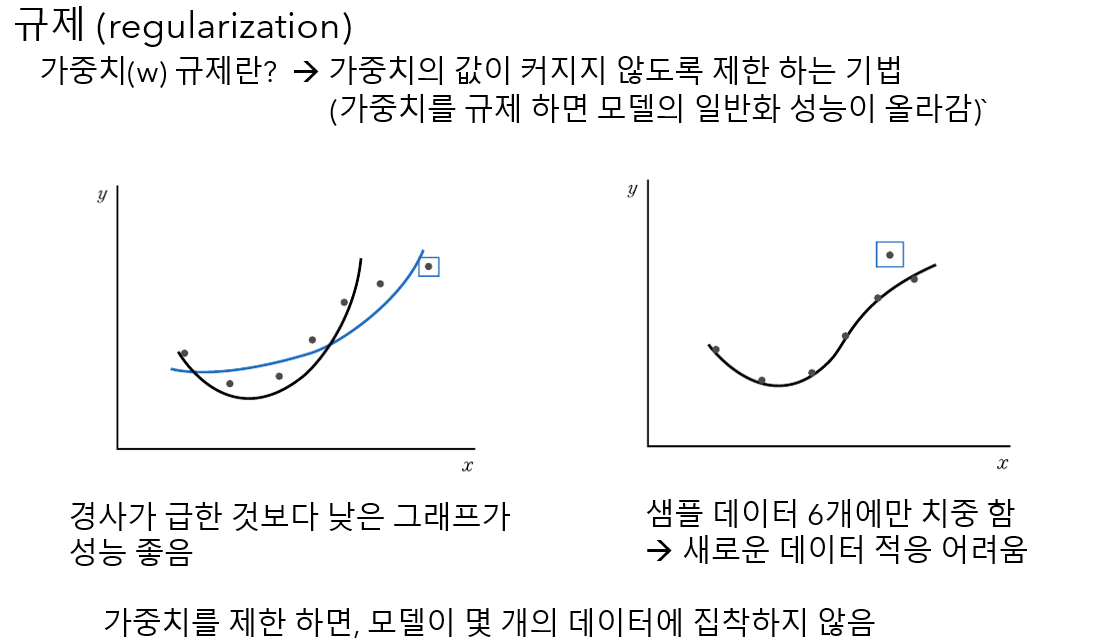

제곱 오차 합 그래프 (SSE)

L2 norm: 가중치를 모두 제곱해서 더한 값

L1 norm: 가중치를 모두 절댓값화 해서 모두 더한 값

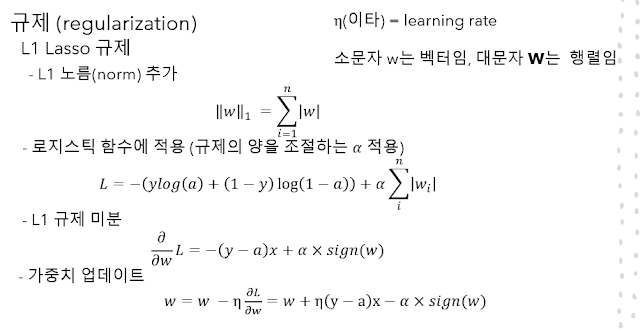

L1 규재는 가중치 제곱을 그냥 가중치 절댓값으로 바꾼것이다. L2 규제와는 대조적으로 L1 규제는 보통 희소한 특성 벡터를 만든다. 

대부분의 특성 가중치가 0이 된다. 실제로 관련 없는 특성이 많은 고차원 데이터셋일 경우 이런 희소성이 도움이 될 수 있다. 

특히 훈련 샘플보다 관련없는 특성이 더 많은 경우이다. -> 이런 맥락에선 L1 규제 채택

### L2 규제의 기하학적 해석

L2 규제는 비용 함수에 패널티 항을 추가한다. 
- 규제가 없는 비용함수로 훈련한 모델에 비해 가중치값을 아주 작게 만드는 효과를 낸다. 


제곱 오차합 비용 함수가 구 모양이어서 로지스틱 회귀의 비용함수보다 그리기 쉽다. 

우리의 목표는 훈련 데이터에서 비용 함수를 최소화하는 가중치 값의 조합을 찾는것이다. 

In [79]:
#가중치 평면에 투영된 블록 비용 함수의 등고선
Image(url='https://git.io/JtY8I', width=500) 

규제를 더 작은 가중치를 얻기 위해 비용 함수에 추가하는 패널티 항으로 생각할 수 있다-> 큰 가중치 제한하겠다. 

규제 파라미터로 규제의 강도를 크게 하면 가중치가 0에 가까워지고 훈련 데이터에 대한 모델 의존성은 줄어든다. 

In [80]:
#L2 규제와 비용 함수
Image(url='https://git.io/JtY8L', width=500) 

- 이차식인 L2 규제 항은 회색 공으로 표현되어 있다. 
- 가중치 값은 규제 예산을 초과할 수 없다 -> 가중치 값의 조합이 회색 공 바깥에 놓일 수 없다. 
  - 그러나 우리는 비용함수를 여전히 최소화 해야된다. 

- 패널티 제약이 있는 상황에서 최선은 L2 회색 공과 규제가 없는 비용 함수의 등고선이 만나는 지점이다.
  - 규제 파라미터를 무한대로 증가하면 가중치 값이 L2 공의 중심점인 0이 될거임. 

**모델을 학습할 만한 충분한 훈련 데이터가 없을 때 편향을 추가하여 모델을 간단하게 만듦으로써 분산을 줄이는 것으로 해석 가능**



### L1 규제를 사용한 희소성

L1 패널티는 절댓값의 합이기 때문에 다이아몬드 모양의 제약 범위를 그릴수 있다. 

In [81]:
Image(url='https://git.io/JtY8t', width=500) 

w_1 일때 비용 함수의 등고선이 L1 다이아몬드와 만나는것을 볼 수 있다.

L1 등고선은 날카롭기 떄문에 비용함수의 포물선과 L1 다이아몬드의 경계가 만나는 최적점은 축에 가깝게 위치할 가능성이 높다. 

**이것이 희소성이 나타나는 이유**

사이킷런에서 L1 규제를 지원하는 모델은 `penalty` 매개변수를 `l1`으로 지정하여 희소한 모델을 만들 수 있다.


In [82]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1', solver='liblinear')

LogisticRegression(penalty='l1', solver='liblinear')

In [83]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=1)
# C=1.0이 기본입니다.
# 규제 효과를 높이거나 낮추려면 C 값을 증가시키거나 감소시킵니다.
lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 1.0


In [87]:
lr.intercept_
# 절편을 확인해보기 

array([-1.26392152, -1.21596534, -2.37040177])

In [85]:
lr.coef_[lr.coef_!=0].shape

(23,)

In [86]:
lr.coef_

array([[ 1.24567209,  0.18072301,  0.74682115, -1.16438451,  0.        ,
         0.        ,  1.1595535 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55864751,  2.50891241],
       [-1.53644846, -0.38769843, -0.99485417,  0.36489012, -0.05989298,
         0.        ,  0.66853184,  0.        ,  0.        , -1.93460212,
         1.23246414,  0.        , -2.23212696],
       [ 0.1355558 ,  0.16880291,  0.35718019,  0.        ,  0.        ,
         0.        , -2.43768478,  0.        ,  0.        ,  1.5635432 ,
        -0.81834553, -0.4930494 ,  0.        ]])

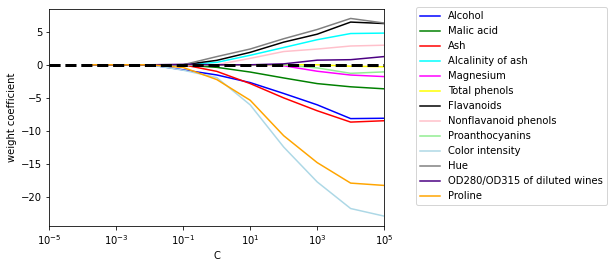

In [88]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('images/04_07.png', dpi=300, 
#             bbox_inches='tight', pad_inches=0.2)
plt.show()

feature detection 의 도구로 활용되는 L1 규제는 결과적으로 데이터셋에 관련이 적은 특성이 있더라도 경고한 모델을 만들어 준다 
- 엄밀히 말하면 앞 예제에서 가중치 벡터는 0이 아닌 원소가 더 많기 때문에 꼭 희소하지 않다. 

**규제 강도를 높여 희소성을 더 강하게 할 수 있다.**

위 그래프에서 볼 수 있듯이 강한 규제 파라미터 C<0,1> 로 모델을 제약하면 모든 가중치가 0이 된다. 

C는 규제 파라미터의 역수

### 순차 특성 알고리즘


모델 복잡도를 줄이고 과대적합을 피하는 다른 방법은 **차원축소** 이다.

- 특성 선택: 원본 특성에서 일부를 선택
- 특성 추출: 일련의 특성에서 얻은 정보로 새로운 특성 만들기

순차특성 선택 알고리즘은 탐욕적 탐색 알고리즘으로 초기 d차원 특성 공간을 k<d 인 k차원 특성 부분 공간으로 축소
- 특성 선택 알고리즘은 주어진 문제에 가장 관련이 높은 특성 부분 집합을 자동으로 선택하는 것이 목적
- 관계없는 특성이나 잡음을 제거하여 계산 효율성을 높이고 모델의 일반화 오차를 줄인다.
- 규제를 제공하지 않는 알고리즘을 사용할 때 유용

전통적인 순차 특성 선택 알고리즘은 **순차 후진 선택(SBS)**이다.
- 계산 효율성을 향상하기 위해 모델 성능을 가능한 적게 희생하면서 초기 특성의 부분 공간으로 특성 차원을 축소
- 과대적합의 문제를 안고있는 모델이라면 SBS가 예측 성능을 높일 수 있음

In [94]:
#SBS 는 아직 사이킷 런에 구현되어 있지 않음, 파이썬으로 직접 구현해보겠삼
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

SBS 구현이 fit메서드 안에서 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누지만 여전히 이 알고리즘에 X_train 데이터만 주입함. 

SBS의 fit 메서드는 훈련과 데스트를 위한 새로운 subset을 만든다 -> 여기서 체스트 데이터셋을 **검증 데이터셋**이라고 함

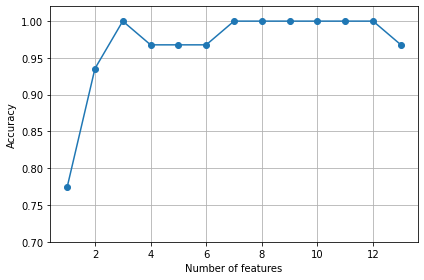

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 특성을 선택합니다
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# 선택한 특성의 성능을 출력합니다
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [91]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [92]:
knn.fit(X_train_std, y_train)
print('훈련 정확도:', knn.score(X_train_std, y_train))
print('테스트 정확도:', knn.score(X_test_std, y_test))

훈련 정확도: 0.967741935483871
테스트 정확도: 0.9629629629629629


In [93]:
knn.fit(X_train_std[:, k3], y_train)
print('훈련 정확도:', knn.score(X_train_std[:, k3], y_train))
print('테스트 정확도:', knn.score(X_test_std[:, k3], y_test))

훈련 정확도: 0.9516129032258065
테스트 정확도: 0.9259259259259259
